In [2]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.neighbors.kde import KernelDensity
import matplotlib.pyplot as plt
import math

In [3]:
from numpy import pi
from scipy.linalg import det
def entropy_gaussian(C):
    '''
    Entropy of a gaussian variable with covariance matrix C
    '''
    if np.isscalar(C): # C is the variance
        return .5*(1 + np.log(2*pi)) + .5*np.log(C)
    else:
        n = C.shape[0] # dimension
        return .5*n*(1 + np.log(2*pi)) + .5*np.log(abs(det(C)))

In [4]:
def entropy_Resub(X):
    '''
    resubstitution estimate
    '''
    kde = KernelDensity(kernel='gaussian', bandwidth=0.2).fit(X[:,None])
    #score_sample returns the Log of the probability density
    logprob = kde.score_samples(X[:,None])
    return -np.mean(logprob)

In [ ]:
from sklearn.model_selection import cross_val_score
def entropy_SplitData(X):
    '''
    Splitting Data Estimate with cross validation
    '''
    kde = KernelDensity(kernel='gaussian', bandwidth=0.2).fit(X[:,None])
    numFold = 5
    TestSize = X.size/5
    return -np.mean(cross_val_score(kde, s1[:,None], cv = 5))/TestSize

In [5]:
mean = 0
stdv = 1
size = 10000
s1 = np.random.normal(mean, stdv, size)

Ground truth of Entropy is:
1.4189385332


Histogram of the distribution


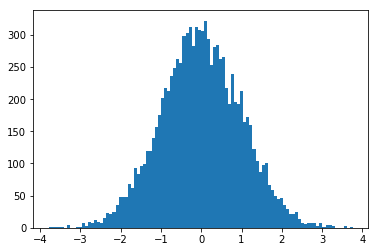

In [6]:
histogram = plt.hist(s1, bins=100)
print ("Histogram of the distribution")
plt.show()

In [7]:
print(s1.size)
'''
print(s1)
'''

10000


'\nprint(s1)\n'

In [ ]:
'''
hist1 = np.histogram(s1, bins=100, range=(-60,60), density=True)
kde = KernelDensity(kernel='gaussian', bandwidth=0.2).fit(s1[:,None])
#score_sample returns the Log of the probability density
logprob = kde.score_samples(s1[:,None])
print (logprob.size)
histogram = plt.hist(logprob, bins=100)
plt.show()

'''
print ("Ground truth of Entropy is:")
print (entropy_gaussian(stdv))

In [11]:
print ("Resubstitution estimate of KDE Entropy is:")
print (entropy_Resub(s1))

Resubstitution estimate of KDE Entropy is:
1.41557466291


In [10]:

print ("Splitting Data estimate of KDE Entropy is:")
print (entropy_SplitData(s1))


1.41689699309
